In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(folder, hIds, cmap, tips):
    data, voltages, lVec = load(folder+"hrstm_"+tips[0])
    fig, axes = plt.subplots(len(tips)*len(hIds),len(voltages),figsize=(24,12))
    for tIdx, tip in enumerate(tips):
        data, voltages, lVec = load(folder+"hrstm_"+tip)
        extent = [lVec[0,0], lVec[1,0], lVec[0,1], lVec[2,1]]
        for hIdx, h in enumerate(hIds):
            for vIdx, voltage in enumerate(voltages):
                axes[tIdx*len(hIds)+hIdx,vIdx].imshow(abs(data[:,:,h,vIdx]).T, origin='lower', cmap=cmap, extent=extent)
                axes[tIdx*len(hIds)+hIdx,vIdx].set_title(tip+" h={}, V={}".format(
                    np.round(1.5+h*lVec[3,2]/(data.shape[-2]-1),1), voltage))
    plt.tight_layout()

In [3]:
def load(name):
    meta = np.load(name+"_meta.npy").item()
    data = np.load(name+".npz")['arr_0'].reshape(meta['dimGrid']+(len(meta['voltages']),))
    return data, meta['voltages'], meta['lVec']

In [4]:
folders = ["./examples/plots/NEB/", "./examples/plots/PT/"]
hIds = [[8], [15]]
cmaps = ['gray', 'binary']
tips = ["pdos", "para", "pypx", "sorb"]

# Comparison Between Tips

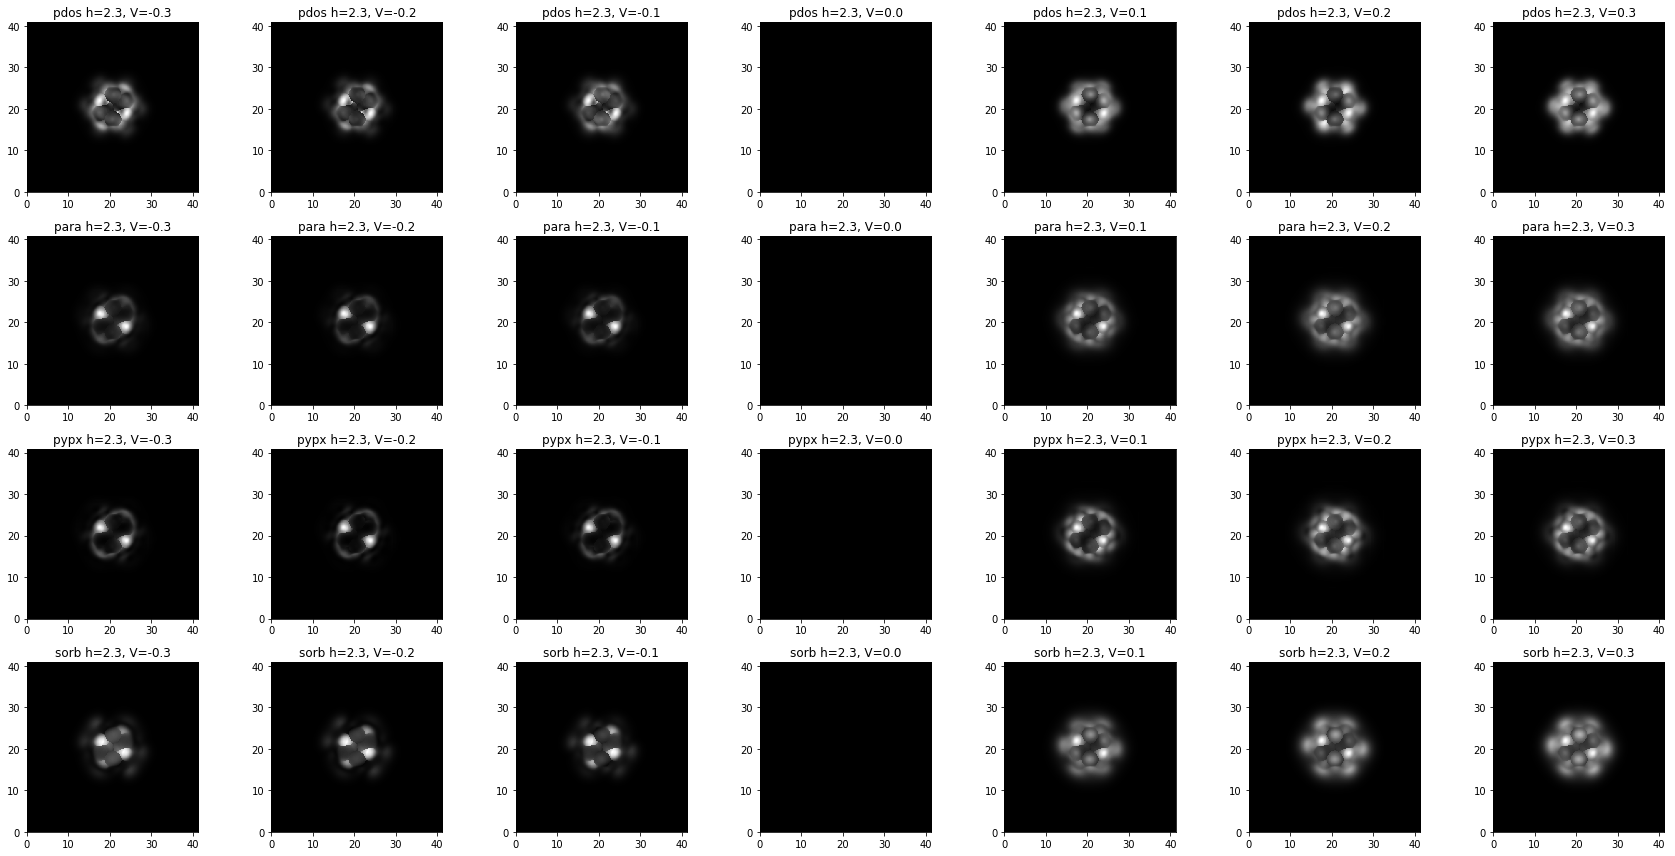

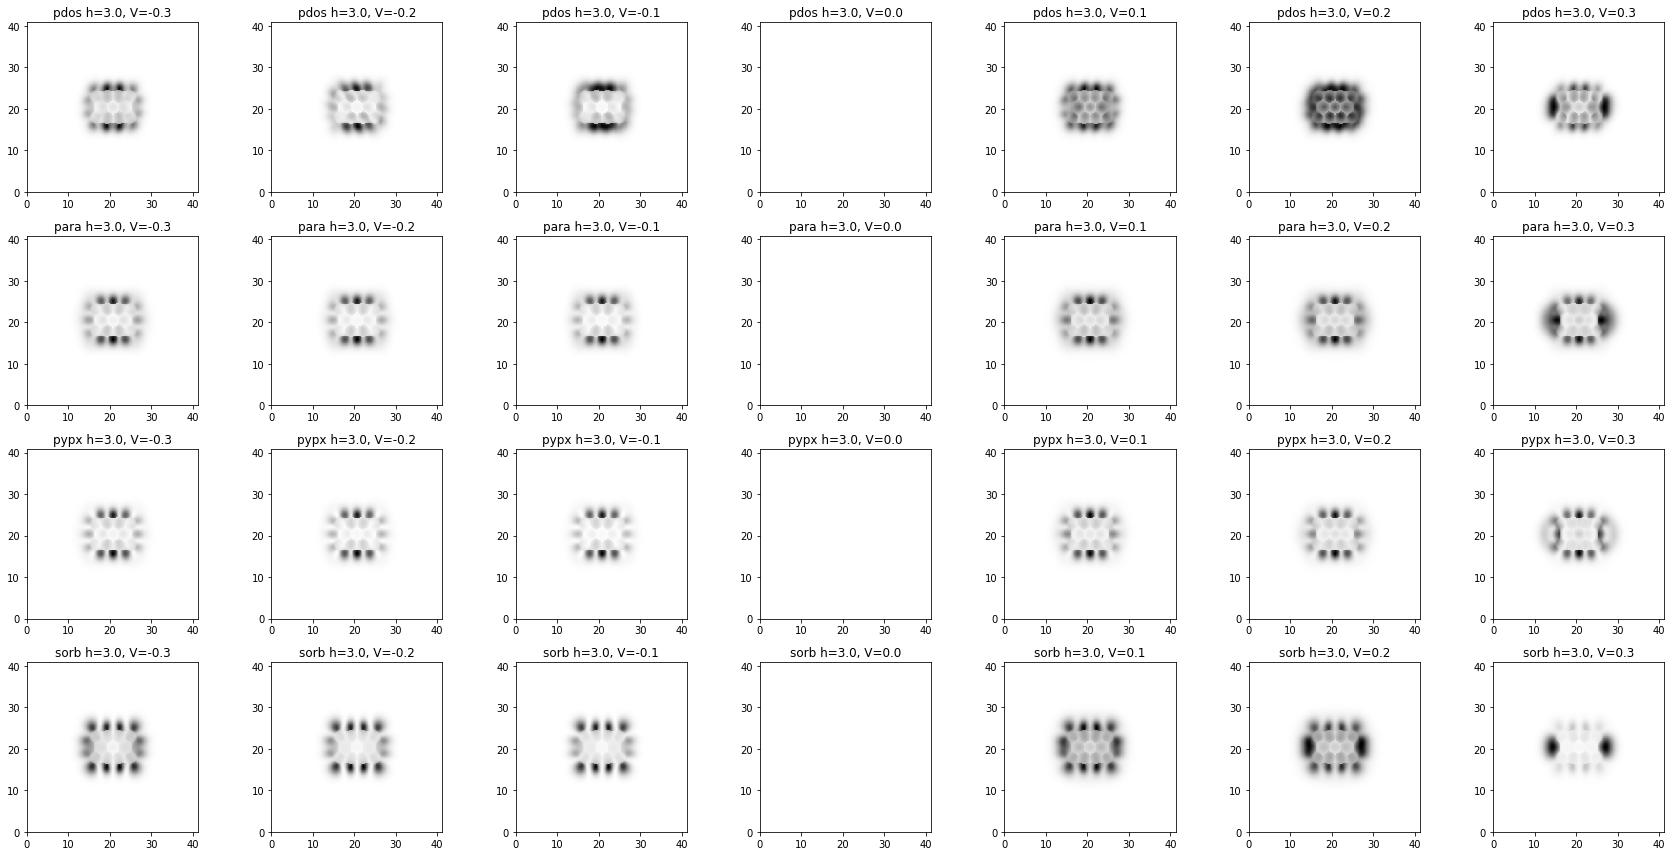

In [5]:
for idx, folder in enumerate(folders):
    plot(folder, hIds[idx], cmaps[idx], tips)

# Slightly Further Away

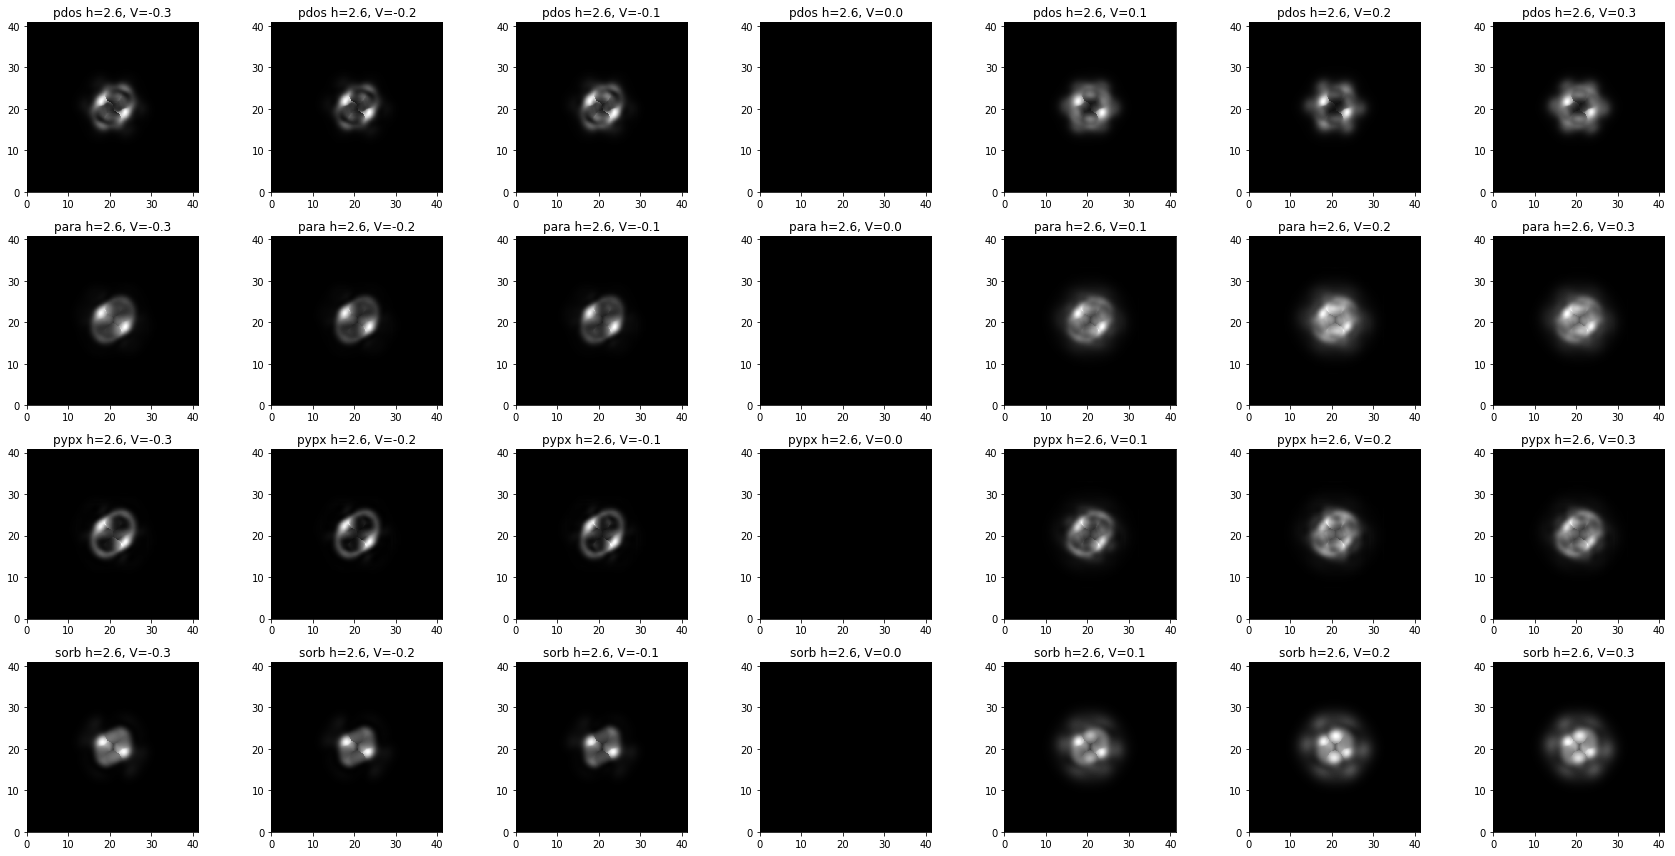

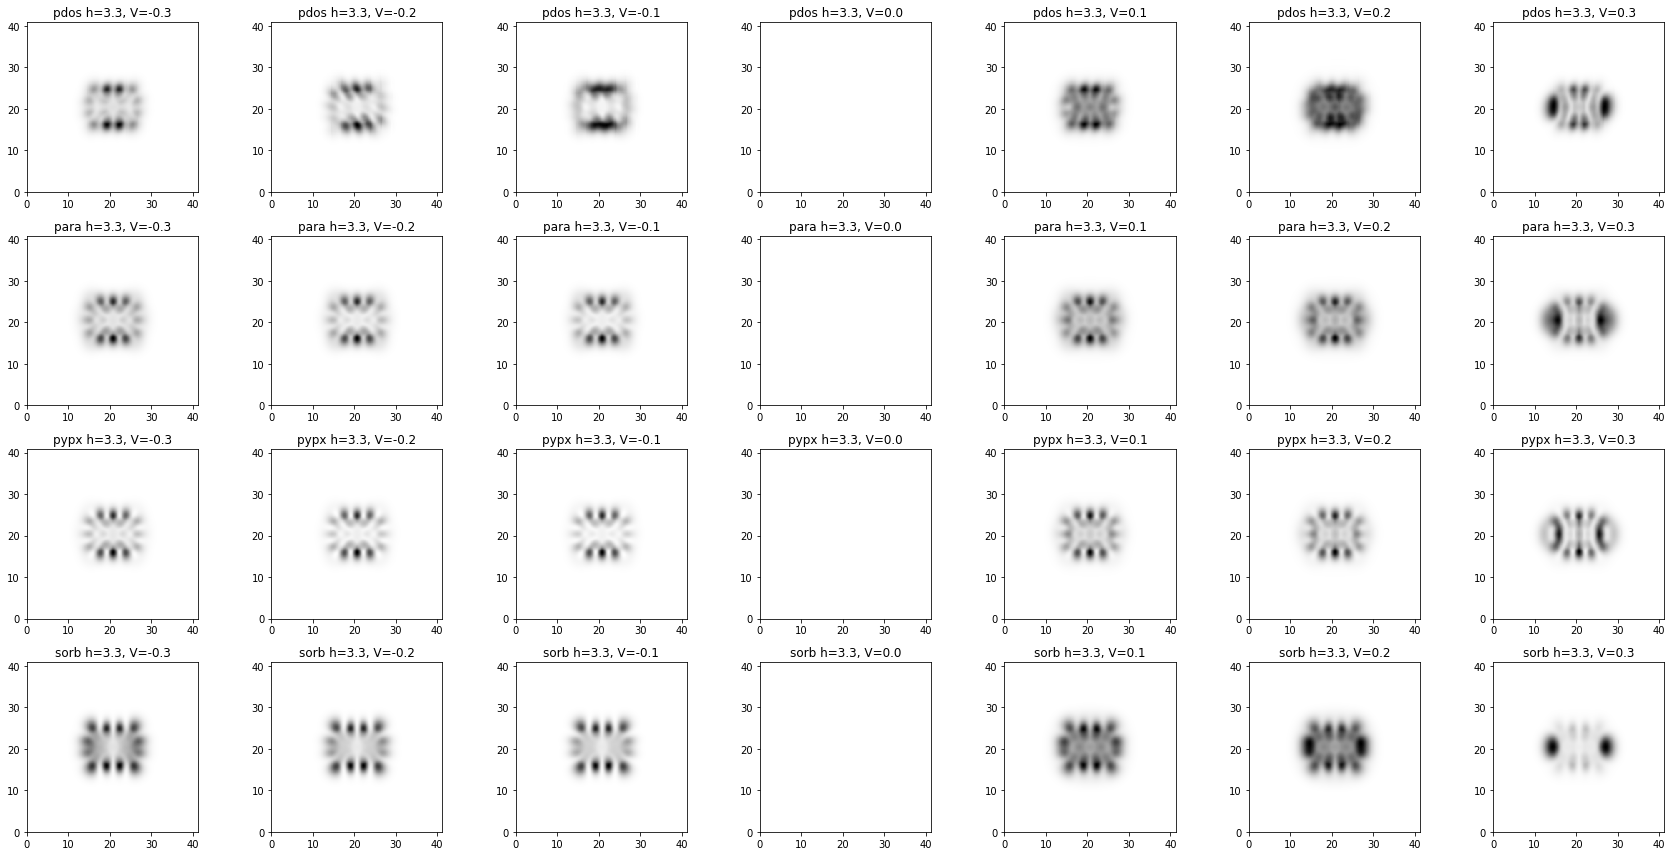

In [6]:
hIds = [[11], [18]]
for idx, folder in enumerate(folders):
    plot(folder, hIds[idx], cmaps[idx], tips)

# Comparison to STM Code

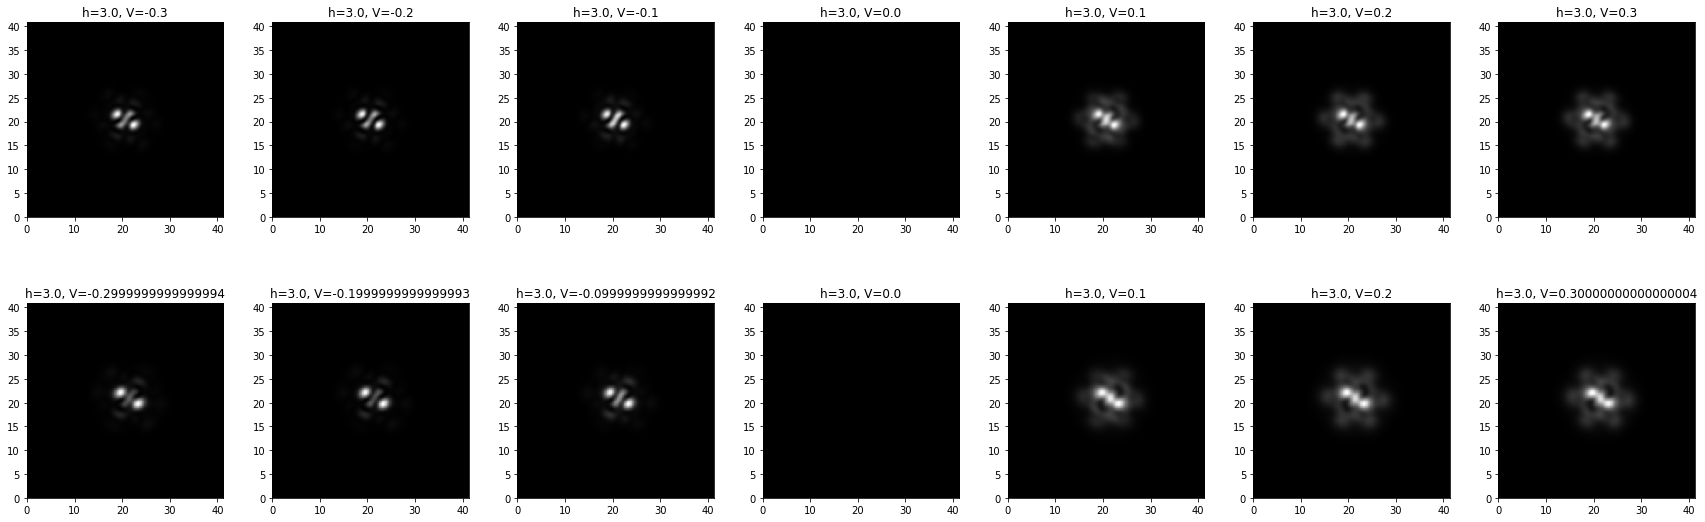

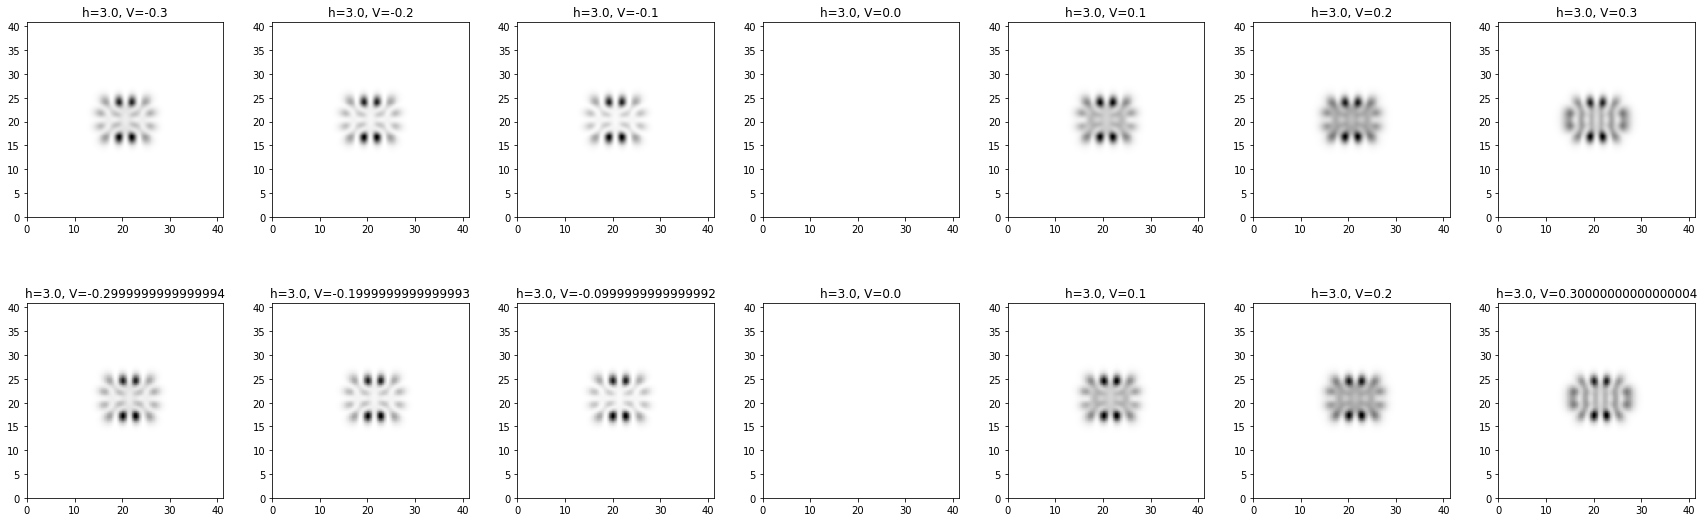

In [7]:
hHIdx = 0
hSIdx = 0
for fIdx, folder in enumerate(folders):
    data, voltages, lVec = load(folder+"hrstm_stm")
    fig, axes = plt.subplots(2,len(voltages),figsize=(24,8))
    extent = [lVec[0,0], lVec[1,0], lVec[0,1], lVec[2,1]]
    for vIdx, voltage in enumerate(voltages):
        axes[0,vIdx].imshow(abs(data[:,:,hHIdx,vIdx]).T, origin='lower', cmap=cmaps[fIdx], extent=extent)
        axes[0,vIdx].set_title("h={}, V={}".format(
            np.round(3.0+hHIdx*lVec[3,2]/(data.shape[-2]-1),1), voltage))
    loaded_data = np.load(folder+"stm.npz")
    heights = loaded_data['heights']
    e_arr = loaded_data['e_arr']
    x_arr = loaded_data['x_arr'] * 0.529177
    y_arr = loaded_data['y_arr'] * 0.529177
    extent = [np.min(x_arr), np.max(x_arr), np.min(y_arr), np.max(y_arr)]
    stm_ch = loaded_data['ch_stm']
    for vIdx, v in enumerate([np.argmin(np.abs(e_arr-voltage)) for voltage in voltages]):
        axes[1,vIdx].imshow(abs(stm_ch[hSIdx,:,:,v]).T, origin='lower', cmap=cmaps[fIdx], extent=extent)
        axes[1,vIdx].set_title("h={}, V={}".format(
            heights[hSIdx], e_arr[v]))
    plt.tight_layout()  